In [19]:
import sys
sys.path.append("..")  # <-  This should point to the root directory of the project relative to this file

from scripts import database

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [31]:
# I tried to get samples between certain dates and it took longer time than what I was expected.
# So, for this task I took random results with sample_size


In [38]:
sample_number = 1000

In [39]:
flights_query =  f"""
                SELECT * FROM flights ORDER BY RANDOM() LIMIT '{sample_number}';
                """

flights = database.query(flights_query)

In [40]:
flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-08-04,AA,AA,AA,1189,AA,N961AN,1189,15304,TPA,...,929.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
1,2019-01-21,AA,AA_CODESHARE,AA,5834,YV,N954LR,5834,14107,PHX,...,1081.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
2,2018-11-10,WN,WN,WN,4413,WN,N8649A,4413,15376,TUS,...,1440.0,337.0,0.0,0.0,0.0,0.0,813.0,10.0,10.0,None
3,2018-11-10,WN,WN,WN,4653,WN,N7723E,4653,13204,MCO,...,829.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
4,2018-01-05,DL,DL,DL,1615,DL,N878DN,1615,10397,ATL,...,581.0,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,None


In [41]:
flights.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name'],
      dtype='object')

In [90]:
DelayDate = flights[["fl_date","arr_delay"]]

In [95]:
DelayDate.isnull().any()

fl_date      False
arr_delay     True
dtype: bool

In [96]:
DelayDate = DelayDate.fillna(0)

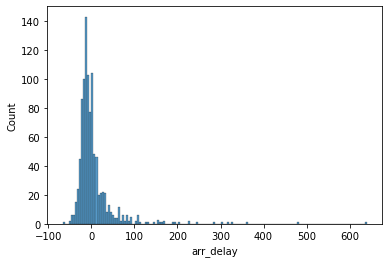

In [98]:
sns.histplot(data=DelayDate, x="arr_delay")
plt.show()

In [103]:
# There are some outliers to be taken care 

In [104]:
stats.shapiro(DelayDate.arr_delay.to_numpy())

ShapiroResult(statistic=0.5485184192657471, pvalue=8.407790785948902e-45)

In [105]:
print(shapiro_test)

ShapiroResult(statistic=0.5485184192657471, pvalue=8.407790785948902e-45)


In [106]:
stats.ttest_1samp(DelayDate.arr_delay.to_numpy(), 0)

Ttest_1sampResult(statistic=3.065897317734841, pvalue=0.002228513808027527)